# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ali Shahedi
2.   Student Number: 401205712


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = (dataset[0:int(len(dataset)*0.8)]['X']).values
y_train = (dataset[0:int(len(dataset)*0.8)]['Y']).values
x_test = (dataset[int(len(dataset)*0.8):]['X']).values
y_test = (dataset[int(len(dataset)*0.8):]['Y']).values

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
from numpy.random import MT19937
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

m = np.linalg.lstsq(np.vstack([x_train, np.ones(len(x_train))]).T, y_train, rcond=None)[0]

In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y , y_train)
test_error = mean_squared_error(predicted_test_y , y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

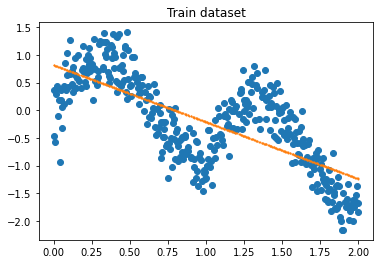

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

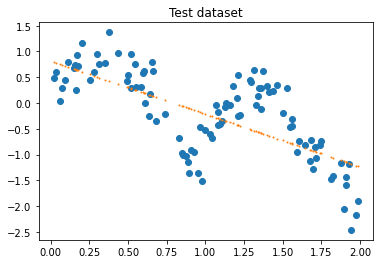

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

**Part4 answere:**

i. Generally if the RMSE(Root of MSE) value is in range of [0.2,0.5], 
we can say our model relatively predict well. in this example the train_RMSE = sqrt(.3246) = 0.57 and test_RMSE = 0.596, So by this results, the model accuracies is not acceptable(we could use the better mertic called R_squraed value)

ii. Projected lines for both train and test sets are inappropriate. because the relationship between X and Y of train and test datastes are non-linear (based on plots)

iii. because both train and test sets have same non-linear  distribution, the dataset also has non-linear  distribution like these sets, So this model does not appropraite for dataset

The main problem is that the model designed based on the linearity relevance between X and Y, But in reality(based on plots) input and output are linked in non-linear space, So even the best line does not fit on the model exactly

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

**answere**
In this method, cost function is applied with another weight which is added to this cost, the formula is \begin{equation*}J(θ)=∑w^{(i)}(y^{(i)}−θ^{(T)}x^{(i)})^2\end{equation*}
w is non-negative parameter. for input which is close to query point, the corresponding w is large and for for input which is far from query point, the w is small. with this method, the non_linear curve fit well on our datasets.




### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/(-2 * hyperparameter **2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((np.expand_dims(train_X,axis=1), np.ones((l,1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * (np.expand_dims(train_Y,axis=1))))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
hyperparameter=0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error((np.asarray(predicted_test))[:,0,0] , y_test)
print(f"MSE test error: {error}")

MSE test error: 0.10590729682859994


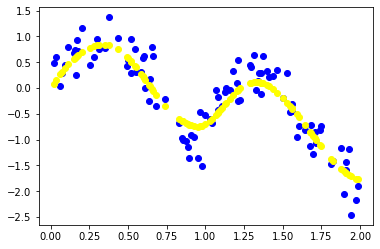

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

**Answere:**
Yes. Based on the fit curve on the plot and the RMSE(sqrt(0.105)) = .324 that is in [0.2,0,5] range, our new model perdict better than first one

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

**Answere 9**

I think it performs well beacause it can fit the desirable curve on the dataset and can be advance by changing the k_value. this dataset is small and low_feature which may be appropriate for KNN model

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1-x2)
        return distance

    def return_nn_ids(self, x):
        indices = np.argsort(np.array([self.distance(x,x1) for x1 in self.X]))[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(np.take(self.Y, list(neareest_indices)))
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(np.asarray(predicted_y) , y_test)
    return error, predicted_y

In [ ]:
k = 30
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09717571174237101


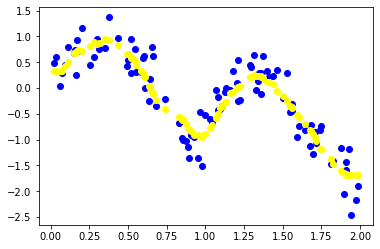

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

**Answere**

Yes, based on plots and MSE, the model performs well like Locally Weighted Linear Regression.

In cell below, the 4_fold_cross validation is cosidered to select the best k value for KNN model

Best k value for the validation set and MSE are : 15 , 0.09356889899759778
Best k value for the test set is : 11 , 0.08234772462333229


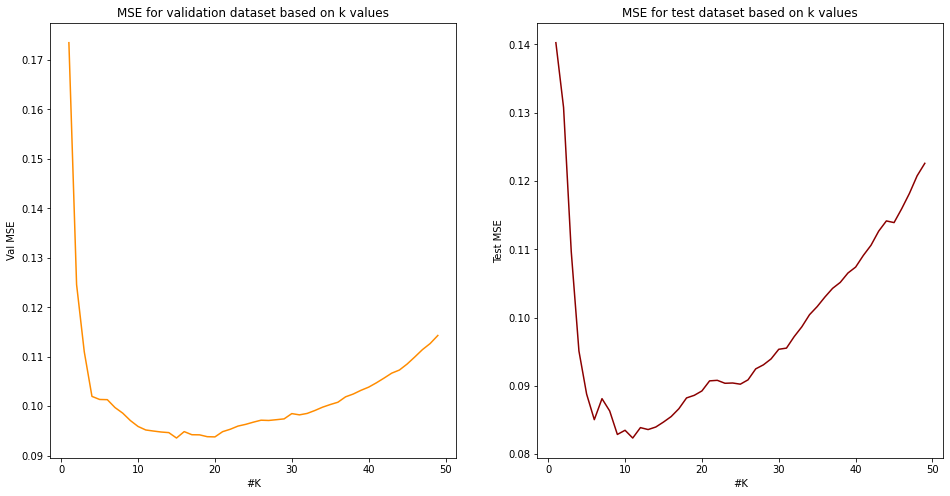

In [ ]:
# 4_fold Cross validation to find the best k ====> for each run = train : 60%, validation : 20%, test : 20%

#Shuffle dataset
shuffled_dataset = dataset.iloc[np.random.permutation(len(dataset))]

#Test for odd k values
val_mse_losses = []
test_mse_losses = []

train_df = shuffled_dataset[0 : int(0.8*len(shuffled_dataset))]
test_df = shuffled_dataset[int(0.8*len(shuffled_dataset)) :]

K_list = [K for K in range(1,50)]
for K in K_list:
    error_val_parts=[]
    for i in [0, 0.25, 0.5, 0.75]:
        val_fold_df = train_df[int(i*len(train_df)): int((i+0.25)* len(train_df))]
        train_fold_df = pd.concat([train_df,val_fold_df]).drop_duplicates(keep=False)
        x_train, y_train = (train_fold_df['X']).values, (train_fold_df['Y']).values
        x_val, y_val = (val_fold_df['X']).values, (val_fold_df['Y']).values
        val_error_knn, _ = evaluation(K, x_train, y_train, x_val, y_val)
        error_val_parts.append(val_error_knn)
    val_mse_losses.append(np.mean(error_val_parts))
    test_error_knn, _ = evaluation(K, x_train, y_train, test_df['X'], test_df['Y'])
    test_mse_losses.append(test_error_knn)

#Plot mse for validation and test results based on k values
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.title("MSE for validation dataset based on k values")
plt.xlabel("#K")
plt.ylabel("Val MSE")
plt.plot(K_list, val_mse_losses, color='darkorange')
plt.subplot(1,2,2)
plt.title("MSE for test dataset based on k values")
plt.xlabel("#K")
plt.ylabel("Test MSE")
plt.plot(K_list, test_mse_losses, color='darkred')

print(f"Best k value for the validation set and MSE are : {K_list[val_mse_losses.index(min(val_mse_losses))]} , {min(val_mse_losses)}")
print(f"Best k value for the test set is : {K_list[test_mse_losses.index(min(test_mse_losses))]} , {min(test_mse_losses)}")    

**4_fold_validation Answere**

In the above cell, 4_fold_validation was executed with KNN model. the value of K has changed in the [1,50] range, and after the execution of cross_validation on these k values, MSE plots for test and validation sets are drawn. based on these plots, the best k value on validation folds is 11. So for the test, we should select k=11 as the optimum value for KNN, but based on the test plot, the best k value is 15. We should consider this point that because of the randomness split of data, the values of k in validation and test were not the same, but the difference between optimum k in these 2 plots is too small that make up select k=11 as the optimum k for test set